In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('transaction.csv')

In [3]:
df.columns.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
print(df.isnull().sum().sort_values(ascending=False)) 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [6]:
for c1, c2 in df.dtypes.reset_index().values:
    if c2=='O':
        print(df[c1].value_counts())
        print(f'\n > **Total Null Values:** {df[c1].isnull().sum()}')
        print(f'\n > **Total Unique Values:** {len(df[c1].unique())}')
        print('-' * 20 + '\n')

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

 > **Total Null Values:** 0

 > **Total Unique Values:** 5
--------------------

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

 > **Total Null Values:** 0

 > **Total Unique Values:** 6353307
--------------------

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

 > **Total Null Values:** 0

 > **Total Unique Values:** 2722362
--------------------



In [7]:
# One-Hot Encode 'type'
type_dummies = pd.get_dummies(df['type'], prefix='type')
df = pd.concat([df, type_dummies], axis=1)
df.drop('type', axis=1, inplace=True)


In [8]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,False,True,False


In [9]:

df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)


In [10]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,False,True,False


In [11]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [12]:
# 4. Feature Engineering: Time-Based Features
# Define constants
MINUTES_IN_HOUR = 60
MINUTES_IN_DAY = 24 * MINUTES_IN_HOUR

# Calculate minute within the day
df['minute_of_day'] = df['step'] % MINUTES_IN_DAY

# Extract hour and minute
df['hour'] = (df['minute_of_day'] // MINUTES_IN_HOUR).astype(int)
df['minute'] = (df['minute_of_day'] % MINUTES_IN_HOUR).astype(int)

# Create cyclical features
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['minute_sin'] = np.sin(2 * np.pi * df['minute'] / 60)
df['minute_cos'] = np.cos(2 * np.pi * df['minute'] / 60)

# (Optional) Extract day features if applicable
DAYS_IN_WEEK = 7
df['day'] = (df['step'] // MINUTES_IN_DAY).astype(int)
df['day_of_week'] = df['day'] % DAYS_IN_WEEK
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / DAYS_IN_WEEK)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / DAYS_IN_WEEK)

# Drop intermediate time-related columns
df.drop(['minute_of_day', 'hour', 'minute', 'day', 'day_of_week'], axis=1, inplace=True, errors='ignore')

In [13]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,hour_sin,hour_cos,minute_sin,minute_cos,day_of_week_sin,day_of_week_cos
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,False,False,False,True,False,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,False,False,False,True,False,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0,False,True,False,False,False,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,False,False,False,True,False,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,0.264665,-0.171108,-0.292442,-0.323814,-0.240959,1,0,False,True,False,False,False,0.000000,1.000000,0.309017,0.951057,0.000000,1.00000
6362616,3.510123,10.153953,1.896491,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,0.000000,1.000000,0.309017,0.951057,0.000000,1.00000
6362617,3.510123,10.153953,1.896491,-0.292442,-0.303665,1.403027,1,0,False,True,False,False,False,0.000000,1.000000,0.309017,0.951057,0.000000,1.00000
6362618,3.510123,1.109765,0.005581,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,0.000000,1.000000,0.309017,0.951057,0.000000,1.00000


In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('isFraud', axis=1)
y = df['isFraud']

# 8. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Data split into training and testing sets.")

# 9. Handle class imbalance with SMOTE (only on training data)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Data split into training and testing sets.


In [15]:
X_train_res

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,hour_sin,hour_cos,minute_sin,minute_cos,day_of_week_sin,day_of_week_cos
0,-1.604680,-0.281436,-0.273396,-0.280700,-0.323814,-0.333411,0,False,False,False,True,False,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
1,-1.569551,-0.286503,-0.288716,-0.292442,-0.323814,-0.333411,0,False,False,False,True,False,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
2,-0.087101,0.300319,-0.288716,-0.292442,-0.179736,-0.101804,0,False,True,False,False,False,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
3,-0.051972,-0.286124,-0.288716,-0.292442,-0.323814,-0.333411,0,False,False,False,True,False,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
4,-0.705374,0.063190,4.228109,4.243634,0.393454,0.270842,0,True,False,False,False,False,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167047,2.322758,-0.201054,-0.268478,-0.292442,-0.307481,-0.302392,0,False,True,False,False,False,0.000000,1.000000,0.207912,0.978148,0.000000,1.00000
10167048,-0.965950,0.014945,-0.223318,-0.292442,-0.323814,-0.333411,0,False,False,False,False,True,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
10167049,0.835546,-0.198994,-0.268047,-0.292442,-0.323814,-0.333411,0,False,False,False,False,True,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000
10167050,0.123121,-0.267085,-0.282283,-0.292442,-0.318384,-0.323331,0,False,True,False,False,False,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000


In [16]:
from imblearn.under_sampling import RandomUnderSampler

# After SMOTE, perform random undersampling
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # Set desired ratio here
X_resampled, y_resampled = rus.fit_resample(X_train_res, y_train_res)
X_resampled

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,hour_sin,hour_cos,minute_sin,minute_cos,day_of_week_sin,day_of_week_cos
0,-1.604680,-0.281436,-0.273396,-0.280700,-0.323814,-0.333411,0,False,False,False,True,False,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
1,-1.569551,-0.286503,-0.288716,-0.292442,-0.323814,-0.333411,0,False,False,False,True,False,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
2,-0.087101,0.300319,-0.288716,-0.292442,-0.179736,-0.101804,0,False,True,False,False,False,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
3,-0.051972,-0.286124,-0.288716,-0.292442,-0.323814,-0.333411,0,False,False,False,True,False,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
4,-0.705374,0.063190,4.228109,4.243634,0.393454,0.270842,0,True,False,False,False,False,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6653532,2.408697,1.803004,0.150520,-0.292442,-0.323814,-0.333411,0,False,False,False,False,True,0.000000,1.000000,0.207912,0.978148,0.000000,1.00000
7318015,-1.342739,0.022249,-0.221791,-0.292442,-0.184071,-0.151516,0,False,True,False,False,False,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
10010010,1.715153,1.692137,0.127340,-0.292442,-0.323814,-0.333411,0,False,False,False,False,True,0.000000,1.000000,0.104528,0.994522,0.000000,1.00000
9388098,1.108865,3.274995,0.458276,-0.292442,-0.323814,-0.333411,0,False,False,False,False,True,0.000000,1.000000,0.104528,0.994522,0.000000,1.00000


In [17]:
import pandas as pd

# Assuming X_resampled and y_resampled are the features and target arrays
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Downsample to 200,000 rows
data_resampled_downsampled = data_resampled.sample(n=200000, random_state=42)
X_final = data_resampled_downsampled.drop('isFraud', axis=1)  # Replace 'target_column' with actual target column name
y_final = data_resampled_downsampled['isFraud']

In [18]:
X_final

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,hour_sin,hour_cos,minute_sin,minute_cos,day_of_week_sin,day_of_week_cos
6312008,-1.034736,11.223142,2.120031,-0.292442,-0.323814,-0.333411,0,False,False,False,False,True,-0.258819,0.965926,-0.182391,0.982190,-0.781831,0.62349
631354,1.072161,0.132009,-0.271175,-0.292442,-0.318437,-0.257787,0,False,True,False,False,False,0.000000,1.000000,0.104528,0.994522,0.000000,1.00000
5075399,2.133061,0.268400,-0.288632,-0.292442,0.872413,0.866364,0,False,True,False,False,False,0.000000,1.000000,0.207912,0.978148,0.000000,1.00000
1028128,0.109622,0.027538,-0.280929,-0.292442,-0.323814,-0.279932,0,False,True,False,False,False,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000
9096632,0.282905,16.262325,3.173597,-0.292442,-0.323814,2.388322,0,False,True,False,False,False,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895619,-0.971639,2.107028,0.214084,-0.292442,-0.296396,0.087207,0,False,True,False,False,False,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
9535631,-1.042614,-0.208782,-0.270094,-0.292442,-0.323814,-0.333411,0,False,False,False,False,True,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
9639230,-0.448302,0.000894,-0.226256,-0.292442,-0.323814,-0.333411,0,False,False,False,False,True,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
1840187,-0.571883,-0.060754,6.059489,6.026993,0.408870,0.305474,0,True,False,False,False,False,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349


C:\Users\Mohnish\AppData\Local\Temp\ipykernel_30728\1488458902.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_final, palette='viridis')


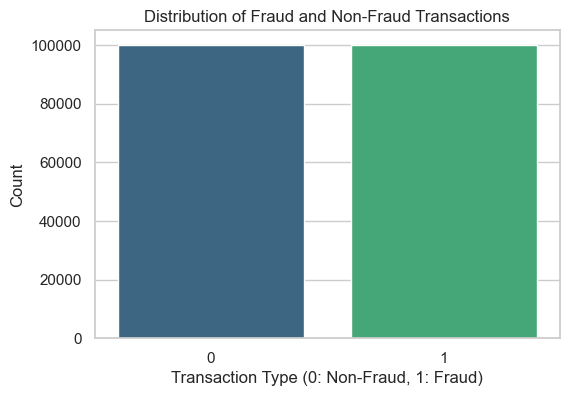

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,hour_sin,hour_cos,minute_sin,minute_cos,day_of_week_sin,day_of_week_cos
6312008,-1.034736,11.223142,2.120031,-0.292442,-0.323814,-0.333411,0,False,False,False,False,True,-0.258819,0.965926,-0.182391,0.982190,-0.781831,0.62349
631354,1.072161,0.132009,-0.271175,-0.292442,-0.318437,-0.257787,0,False,True,False,False,False,0.000000,1.000000,0.104528,0.994522,0.000000,1.00000
5075399,2.133061,0.268400,-0.288632,-0.292442,0.872413,0.866364,0,False,True,False,False,False,0.000000,1.000000,0.207912,0.978148,0.000000,1.00000
1028128,0.109622,0.027538,-0.280929,-0.292442,-0.323814,-0.279932,0,False,True,False,False,False,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000
9096632,0.282905,16.262325,3.173597,-0.292442,-0.323814,2.388322,0,False,True,False,False,False,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895619,-0.971639,2.107028,0.214084,-0.292442,-0.296396,0.087207,0,False,True,False,False,False,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
9535631,-1.042614,-0.208782,-0.270094,-0.292442,-0.323814,-0.333411,0,False,False,False,False,True,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
9639230,-0.448302,0.000894,-0.226256,-0.292442,-0.323814,-0.333411,0,False,False,False,False,True,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
1840187,-0.571883,-0.060754,6.059489,6.026993,0.408870,0.305474,0,True,False,False,False,False,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plot
sns.set(style='whitegrid')
# Create a bar plot for the target variable 'isFraud'
plt.figure(figsize=(6, 4))
sns.countplot(x=y_final, palette='viridis')

# Add title and labels
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.xlabel('Transaction Type (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')

# Show plot
plt.show()
X_final

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Best parameters from the grid search
best_params_rf = {
    'max_depth': None, 
    'min_samples_leaf': 1, 
    'min_samples_split': 2, 
    'n_estimators': 200
}

# Initialize the RandomForestClassifier with the best parameters
rf_model = RandomForestClassifier(
    max_depth=best_params_rf['max_depth'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    n_estimators=best_params_rf['n_estimators'],
    random_state=42  # Set a random state for reproducibility
)

# Train the model with your training data
rf_model.fit(X_final, y_final)

# Optionally, make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

# If you want to calculate the ROC AUC score for the test set
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"ROC AUC score for RandomForestClassifier on test set: {roc_auc}")


ROC AUC score for RandomForestClassifier on test set: 0.999145873849489


In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score

# Best parameters from the grid search
best_params_xgb = {
    'learning_rate': 0.1, 
    'max_depth': 10, 
    'n_estimators': 200, 
    'subsample': 0.9
}

# Initialize the XGBClassifier with the best parameters
xgb_model = XGBClassifier(
    learning_rate=best_params_xgb['learning_rate'],
    max_depth=best_params_xgb['max_depth'],
    n_estimators=best_params_xgb['n_estimators'],
    subsample=best_params_xgb['subsample'],
    use_label_encoder=False,   # Disable label encoding if you're using newer XGBoost versions
    random_state=42  # Set a random state for reproducibility
)

# Train the model with your training data
xgb_model.fit(X_train_res, y_train_res)

# Predictions for training set
y_train_pred = xgb_model.predict(X_train_res)

# Predictions for test set
y_test_pred = xgb_model.predict(X_test)

# Calculate ROC AUC for test set
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC score for XGBClassifier on test set: {roc_auc}")

# Calculate precision and recall for training set
train_precision = precision_score(y_train_res, y_train_pred)
train_recall = recall_score(y_train_res, y_train_pred)

# Calculate precision and recall for test set
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Print the results
print(f"Train Precision: {train_precision}")
print(f"Train Recall: {train_recall}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")


c:\Users\Mohnish\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:50:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC score for XGBClassifier on test set: 0.9997642006965763
Train Precision: 0.9985890105097303
Train Recall: 0.9998695787136723
Test Precision: 0.4417910447761194
Test Recall: 0.9908703590992087


In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score

# Best parameters from the grid search
best_params_xgb = {
    'learning_rate': 0.1, 
    'max_depth': 10, 
    'n_estimators': 200, 
    'subsample': 0.9
}

# Initialize the XGBClassifier with the best parameters
xgb_model = XGBClassifier(
    learning_rate=best_params_xgb['learning_rate'],
    max_depth=best_params_xgb['max_depth'],
    n_estimators=best_params_xgb['n_estimators'],
    subsample=best_params_xgb['subsample'],
    use_label_encoder=False,   # Disable label encoding if you're using newer XGBoost versions
    random_state=42  # Set a random state for reproducibility
)

# Train the model with your training data
xgb_model.fit(X_resampled, y_resampled)

# Predictions for training set
y_train_pred = xgb_model.predict(X_resampled)

# Predictions for test set
y_test_pred = xgb_model.predict(X_test)

# Calculate ROC AUC for test set
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC score for XGBClassifier on test set: {roc_auc}")

# Calculate precision and recall for training set
train_precision = precision_score(y_resampled, y_train_pred)
train_recall = recall_score(y_resampled, y_train_pred)

# Calculate precision and recall for test set
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Print the results
print(f"Train Precision: {train_precision}")
print(f"Train Recall: {train_recall}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")


c:\Users\Mohnish\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:06:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC score for XGBClassifier on test set: 0.9997162144697527
Train Precision: 0.9985919790150454
Train Recall: 0.9998878731022522
Test Precision: 0.4454172366621067
Test Recall: 0.9908703590992087


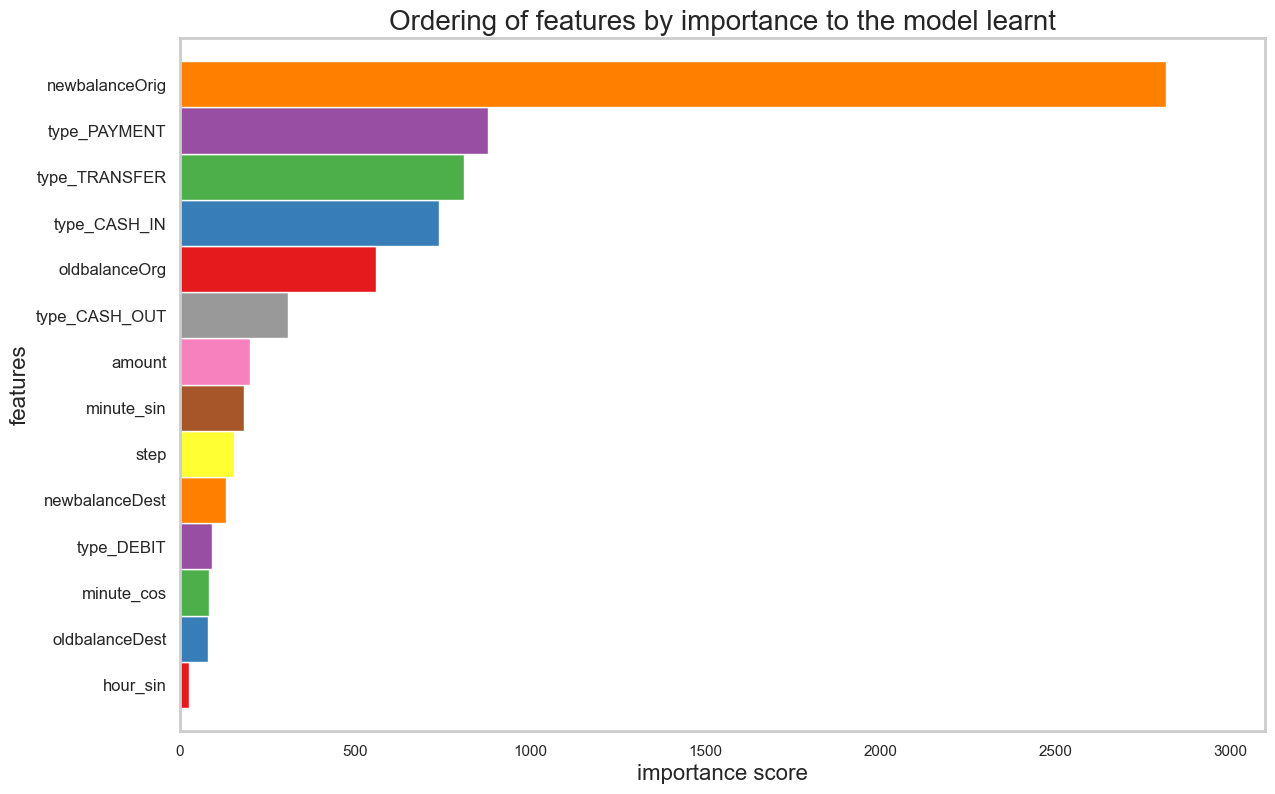

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import plot_importance

fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(xgb_model, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);